Dual Y line graphs for OAK and NYN


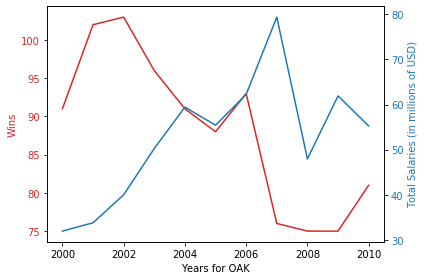

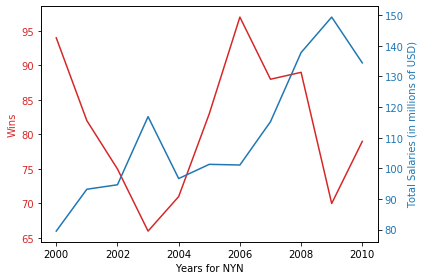


Boxplots for wins and total salaries for all teams in TEAM


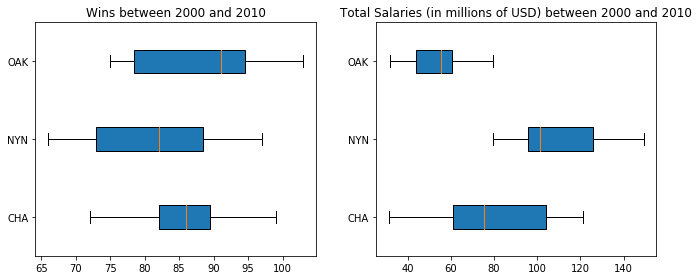

XY scatter charts


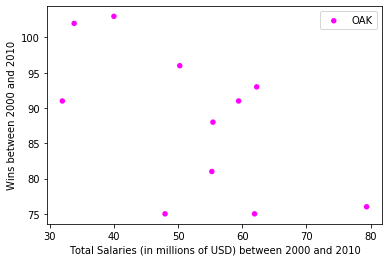

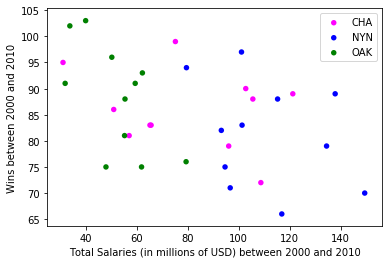

In [11]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

from get_csv_files import get_zipped_csv_files
import wins_and_salaries_graph as wsg
import pandas

# Problem 1(a)
csv_files = ['Salaries.csv', 'Teams.csv']

get_zipped_csv_files(csv_files=csv_files)

salary_data = pandas.read_csv('Salaries.csv') 
teams_data = pandas.read_csv('Teams.csv')

salary_data.head()
teams_data.head()

# Problem 1(b)
salary_totals = salary_data.groupby(['yearID', 'teamID'])['salary'].sum()
salary_totals.head()

# Problem 1(c)
wins_and_salaries = pandas.merge(salary_totals, teams_data[['yearID', 'teamID', 'W']], on=['yearID', 'teamID'], how='inner')
wins_and_salaries.head()

START_YEAR = 2000
END_YEAR = 2010
TEAMS = ['CHA', 'NYN', 'OAK']

#  Problem 1(d).  I have chosen three types of graphs to describe a relationship between total wins and total salaries.
#  First I made a line graph that has two different y axes that share the same x axis.  Since wins and salaries share
#  the year range (x-axis), I can plot the second series (total salaries) against the secondary Y axis on the right
#  side of the graph.  As seen in this chart, when the total salaries for the Oakland A's were at their highest,
#  the wins were at their lowest.  The highest total wins occurred in 2002, yet their total salaries were not at their
#  highest. Also, as total salaries rose between 2002 and 2005, their wins decreased.  This decrease in wins and increase
#  in total salaries, can also been seen from years 2006 through 2007.  It appears that there is a threshold based
#  on salary that results in more wins per year, when it is not crossed.  This phenomena of wins decreasing as total
#  salaries are increasing can be seen with the New York Yankees (NYN) too.

print("Dual Y line graphs for OAK and NYN")
wsg.graph_dual_y(wins_and_salaries, 'OAK', START_YEAR, END_YEAR)
wsg.graph_dual_y(wins_and_salaries, 'NYN', START_YEAR, END_YEAR)

# While the dual y line charts are handy for visualizing the wins and total salaries over time of a given team,
# parallel box plots are useful for making a more orderly chart to compare wins and total salaries of multiple teams.
# Out of all the teams in TEAMS, the box plots for OAK show that they have most wins (with great variation, 75 to 115),
# despite having the lowest total salaries (with less variation).  Also, OAK has the highest median wins despite
# having the lowest median total salaries.  Since the right tail is longer than the left tail on both boxplots
# (wins and total salaries) for OAK, the shape of these boxplots are skewed right.  NYN has the lowest median wins
# and the highest median salaries.  However, this still does not give a clear correlation between wins and total salaries.
# For that, we will need a xy scatter chart.

print("\nBoxplots for wins and total salaries for all teams in TEAM")
wsg.graph_boxplots(wins_and_salaries, TEAMS, START_YEAR, END_YEAR)

# In the xy scatter chart, Wins is the dependent variable of total salaries (the independent variable).
# It appears linear in form with a negative direction, for OAK, as total salaries increase.  However, it's
# very weak in correlation.  Matter of fact, there is almost no correlation.

print("XY scatter charts")
wsg.xy_scatter_3_teams(wins_and_salaries, ['OAK'], START_YEAR, END_YEAR)

# The same is also true for the second xy scatter chart of each individual team
# listed in TEAMS.  The pattern on the chart does show a weak correlation (with a negative direction)
# of all 3 teams together.
wsg.xy_scatter_3_teams(wins_and_salaries, TEAMS, START_YEAR, END_YEAR)
